<a href="https://colab.research.google.com/github/AstroMusers/RomanYieldEstimates/blob/main/fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyLIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas==1.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pandas==1.4.3 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5)
ERROR: No matching distribution found for pandas==1.4.3


In [ ]:
# import relevant libraties

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import os, sys
import pandas as pd
import random

from pyLIMA import microlsimulator, telescopes, event, microlmodels, microloutputs, microltoolbox

In [ ]:
# load sources and lens population generated by TRILEGAL

sources = np.loadtxt(r"/content/drive/MyDrive/sources.txt")
lens = np.loadtxt(r"/content/drive/MyDrive/lenses.txt")

In [ ]:
# Functions to draw from parameter distributions given the information about lenses and sources

def get_theta_E(s,l):
    G = 6.6743e-11 
    pi = 3.141
    c = 299792458
    d_s = 10**((s[7] + 5)/5)
    d_l = 10**((l[7] + 5)/5) 
#     d_s = s[7]
#     d_l = l[7]
    d_ls = d_s - d_l
    solar_mass_to_kg = 1.989e+30
    parsec_to_meter = 3.086e16
    solar_mass = l[-1]
    theta_E = np.sqrt((4*G*solar_mass*solar_mass_to_kg)/(c**2) * (d_ls*parsec_to_meter/(d_l*parsec_to_meter*d_s*parsec_to_meter))) * (3600 * 180)/pi
    return theta_E

def get_rho(s, l):
    sigma = 5.670367e-8
    pi = 3.141
    lum = 10**s[4]
    temp = 10**s[5]
    d_s = 10**((s[7] + 5)/5)
    solar_lum_to_watt = 3.826e26
    parsec_to_meter = 3.086e16
    rho = ((np.sqrt(lum*solar_lum_to_watt/(4*pi*sigma*temp**4)) / (d_s*parsec_to_meter)) * ((3600 * 180) / pi)) / get_theta_E(s, l)
    return rho

def exoplanet_mass():
    return 0.001*np.exp(-3*random.random())

def semimajor_axis():
    return 30*np.exp(-3*random.random())

def logs(s,l):
    pi = 3.141
    d_l = 10**((l[7] + 5)/5)
    au_to_parsec = 206300
#     sep = se/(2*pi*d_l * 3.086e+13) * 3600 / get_theta_E(s, l)
    sep = (semimajor_axis()/ au_to_parsec / d_l) * (3600 * 180) / pi / get_theta_E(s, l)
    return np.log10(sep)

def logq_exp(l):
    return np.log10(exoplanet_mass()/l[-1])

def logq_stellar(l):
    return np.log10(l[9])

def al():
    # angle between the source trajectory and the the binary lens axis
    alpha = random.randint(-3140,3140)/1000 # theta_e
    return alpha

In [ ]:
# interpolation of photometric precision as a function of magnitude

from scipy import interpolate
import numpy as np
precision = np.loadtxt(r"/content/drive/MyDrive/roman_precision.txt")
interp = interpolate.interp1d(precision[:, 0], precision[:, 1], kind = 'linear')

In [ ]:
# set up base cadence, sampling and filter model of Roman

test_event = microlsimulator.simulate_a_microlensing_event(name ='Test 1', 
                                                                ra=270, dec=-30)

t_start = 2457300
separation = 90

# roman1 = microlsimulator.simulate_a_telescope('Roman1',test_event, t_start,t_start+72,0.25, 'Space','W149',
#                                                   uniform_sampling=True)
# roman2 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+2*72, t_start+3*72,0.25, 'Space','W149',
#                                                   uniform_sampling=True)
# roman3 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+4*72, t_start+5*72,0.25, 'Space','W149',
#                                                   uniform_sampling=True)
# roman4 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+6*72, t_start+7*72,0.25, 'Space','W149',
#                                                   uniform_sampling=True)
# roman5 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+8*72, t_start+9*72,0.25, 'Space','W149',
#                                                   uniform_sampling=True)

roman1 = microlsimulator.simulate_a_telescope('Roman1',test_event, t_start,t_start+72,0.25, 'Space','W149',
                                                  uniform_sampling=True)
roman2 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+72+90, t_start+2*72+90,0.25, 'Space','W149',
                                                  uniform_sampling=True)
roman3 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+2*72+90*2, t_start+3*72+90*2,0.25, 'Space','W149',
                                                  uniform_sampling=True)
roman4 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+3*72+90*3, t_start+4*72+90*3,0.25, 'Space','W149',
                                                  uniform_sampling=True)
# roman5 = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+4*72+90*4, t_start+9*72,0.25, 'Space','W149',
#                                                   uniform_sampling=True)

roman_tot = microlsimulator.simulate_a_telescope('Roman1',test_event,t_start+10*72, t_start+11*72,0.25, 'Space','W149',
                                                  uniform_sampling=True)

roman5 = microlsimulator.simulate_a_telescope('Roman2',test_event, t_start,t_start+72,12, 'Space','Z084',
                                                  uniform_sampling=True)
roman6 = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+72+90, t_start+2*72+90,12, 'Space','Z084',
                                                  uniform_sampling=True)
roman7 = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+2*72+90*2, t_start+3*72+90*2,12, 'Space','Z084',
                                                  uniform_sampling=True)
roman8 = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+3*72+90*3, t_start+4*72+90*3,12, 'Space','Z084',
                                                  uniform_sampling=True)

roman_new = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+10*72, t_start+11*72,12, 'Space','Z084',
                                                  uniform_sampling=True)

# roman6 = microlsimulator.simulate_a_telescope('Roman2',test_event, t_start,t_start+72,12, 'Space','Z084',
#                                                   uniform_sampling=True)
# roman7 = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+2*72, t_start+3*72,12, 'Space','Z084',
#                                                   uniform_sampling=True)
# roman8 = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+4*72, t_start+5*72,12, 'Space','Z084',
#                                                   uniform_sampling=True)
# roman9 = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+6*72, t_start+7*72,12, 'Space','Z084',
#                                                   uniform_sampling=True)
# roman10 = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+8*72, t_start+9*72,12, 'Space','Z084',
#                                                   uniform_sampling=True)


# roman_new = microlsimulator.simulate_a_telescope('Roman2',test_event,t_start+10*72, t_start+11*72,12, 'Space','Z084',
#                                                   uniform_sampling=True)
roman_tot.lightcurve_flux = np.r_[roman1.lightcurve_flux,roman2.lightcurve_flux,roman3.lightcurve_flux,roman4.lightcurve_flux]
roman_new.lightcurve_flux = np.r_[roman5.lightcurve_flux,roman6.lightcurve_flux,roman7.lightcurve_flux,roman8.lightcurve_flux]
# print(roman_tot.lightcurve_flux)
# roman_new.lightcurve_flux = np.r_[roman6.lightcurve_flux,roman7.lightcurve_flux,roman8.lightcurve_flux,roman9.lightcurve_flux,roman10.lightcurve_flux]

test_event.telescopes.append(roman_tot)
test_event.telescopes.append(roman_new)

# test_event.telescopes.append(microlsimulator.simulate_a_telescope('RomanP',test_event, t_start,2457300+800,0.25, 'Space','W149',
#                                                       uniform_sampling=True))
# test_event.telescopes.append(microlsimulator.simulate_a_telescope('RomanS',test_event, t_start,2457300+800,12, 'Space','Z087',
#                                                       uniform_sampling=True))

In [ ]:
# function to generate a light curve given a model type by drawing from parameter generating functions

def generate_light_curve(modeltype='PSPL', index = None, sources=None, lens=None):
    if modeltype == 'Red noise':
        model = microlsimulator.simulate_a_microlensing_model(test_event, model='PSPL')
    else:
        model = microlsimulator.simulate_a_microlensing_model(test_event, model=modeltype)
        
    parameters = microlsimulator.simulate_microlensing_model_parameters(model)
    parameters[0] = np.random.uniform(2457300, 2457300 + 4*72+90*3)
    parameters[1] = np.random.uniform(0,1)
    parameters[2] = np.random.uniform(1,500)
    
    # flux_parameters = microlsimulator.simulate_fluxes_parameters(test_event.telescopes)
    a = np.random.uniform(0,1)
    b = microltoolbox.magnitude_to_flux(np.random.uniform(14, 22))
    flux_parameters = [b,a,b,a]
    parameters += flux_parameters
    # flux_parameters[0] = flux_parameters[2]
    # flux_parameters[1] = flux_parameters[3]
    # parameters += flux_parameters
    
    params_list = []
    
    if modeltype == 'PSBL':
        parameters = parameters[:3]
        if lens[index][9] > 0:
            mass_ratio = logq_stellar(lens[index])
        else:
            mass_ratio = logq_exp(lens[index])
        l = [logs(sources[index],lens[index]),mass_ratio,al()]
        parameters = parameters + l + flux_parameters
        params_list = parameters[:3]+[np.nan]+l
    elif modeltype == 'Red noise':
        parameters[0] = 0
        params_list = parameters[:3]+[np.nan]*4
    elif modeltype == 'FSPL':
        parameters[3] = get_rho(sources[index],lens[index])
        params_list = parameters[:4]+[np.nan]*3
    elif modeltype in ['FSBL','USBL']:
        parameters = parameters[:3]
        if lens[index][9] > 0:
            mass_ratio = logq_stellar(lens[index])
        else:
            mass_ratio = logq_exp(lens[index])
        parameters = parameters + [get_rho(sources[index],lens[index]),logs(sources[index],lens[index]),mass_ratio,al()]
        params_list = parameters
    elif modeltype == 'PSPL':
        params_list = parameters[:3] + [np.nan]*4
    
    params_list += flux_parameters
    
    pyLIMA_parameters = model.compute_pyLIMA_parameters(parameters)
    microlsimulator.simulate_lightcurve_flux(model, pyLIMA_parameters,  red_noise_apply='No')
    w149_mag = np.array(test_event.telescopes[0].lightcurve_magnitude)
    z087_mag = np.array(test_event.telescopes[1].lightcurve_magnitude)
    w149_mag[:, 2] = interp(w149_mag[:,1])
    z087_mag[:, 2] = interp(z087_mag[:,1])
    w149_mag[:,1] = w149_mag[:,1] + np.random.randn(w149_mag[:,1].shape[0]) * w149_mag[:, 2]
    z087_mag[:,1] = z087_mag[:,1] +np.random.randn(z087_mag[:,1].shape[0]) * z087_mag[:, 2]
    
    return [params_list] + [w149_mag.astype('float32')] + [z087_mag.astype('float32')]


[[2457751.9292402077, 0.053142015739602644, 218.3883050341574, 0.0002579165380900628, 0.24592282647769748, -3.3177691519431516, 0.06, 373.24062201381736, 0.9389656414782436, 373.24062201381736, 0.9389656414782436], array([[2.4573000e+06, 2.0218163e+01, 6.0554598e-03],
       [2.4573000e+06, 2.0221523e+01, 6.0383263e-03],
       [2.4573000e+06, 2.0218948e+01, 6.0377195e-03],
       ...,
       [2.4578580e+06, 1.9721157e+01, 4.7701080e-03],
       [2.4578580e+06, 1.9725994e+01, 4.7833472e-03],
       [2.4578580e+06, 1.9728346e+01, 4.7845128e-03]], dtype=float32), array([[2.4573000e+06, 2.0221901e+01, 6.0332995e-03],
       [2.4573005e+06, 2.0211782e+01, 6.0431878e-03],
       [2.4573010e+06, 2.0215538e+01, 6.0565062e-03],
       ...,
       [2.4578565e+06, 1.9708906e+01, 4.7449078e-03],
       [2.4578570e+06, 1.9713066e+01, 4.7662207e-03],
       [2.4578575e+06, 1.9726559e+01, 4.7659311e-03]], dtype=float32)] (3,)


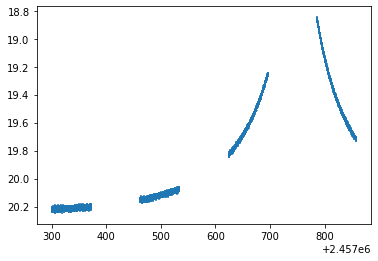

In [ ]:
lc = generate_light_curve('FSBL', index = 0, sources = sources, lens = lens)
print(lc, np.array(lc).shape)
plt.errorbar(lc[-2][:,0],lc[-2][:,1],lc[-2][:,2], ls = 'None')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# generate FSPL events

fspl = pd.DataFrame(columns = ['t_0','u_0','t_E','rho','logs','logq','alpha','fs_W149',
                                    'g_W149','fs_Z087','g_Z087','w149_mag', 'z087_mag'])

for i in range(7000):
    t = True
    while t:
        try:
            lc = generate_light_curve('FSPL', index = i, sources = sources, lens = lens)
            length = len(fspl)
            fspl.loc[length] = np.array(lc[0] + lc[1:])
            t = False
        except:
            continue
    if i % 100 == 0:
        print(f"On light curve {i}")  

On light curve 0
On light curve 100
On light curve 200
On light curve 300
On light curve 400
On light curve 500
On light curve 600
On light curve 700
On light curve 800
On light curve 900
On light curve 1000
On light curve 1100
On light curve 1200
On light curve 1300
On light curve 1400
On light curve 1500
On light curve 1600
On light curve 1700
On light curve 1800
On light curve 1900
On light curve 2000
On light curve 2100
On light curve 2200
On light curve 2300
On light curve 2400
On light curve 2500
On light curve 2600
On light curve 2700
On light curve 2800
On light curve 2900
On light curve 3000
On light curve 3100
On light curve 3200
On light curve 3300
On light curve 3400
On light curve 3500
On light curve 3600
On light curve 3700
On light curve 3800
On light curve 3900
On light curve 4000
On light curve 4100
On light curve 4200
On light curve 4300
On light curve 4400
On light curve 4500
On light curve 4600
On light curve 4700
On light curve 4800
On light curve 4900
On light cur

In [ ]:
# generate FSBL events

fsbl = pd.DataFrame(columns = ['t_0','u_0','t_E','rho','logs','logq','alpha','fs_W149',
                                    'g_W149','fs_Z087','g_Z087','w149_mag', 'z087_mag'])
for i in range(0,7000):
    t = True
    while t:
        try:
            lc = generate_light_curve('FSBL', index = i+7000, sources = sources, lens = lens)
            length = len(fsbl)
            fsbl.loc[length] = np.array(lc[0] + lc[1:])
            t = False
        except:
            continue
    if i % 30 == 0:
        print(f"On light curve {i}")

On light curve 0
On light curve 30
On light curve 60
On light curve 90
On light curve 120
On light curve 150
On light curve 180
On light curve 210
On light curve 240
On light curve 270
On light curve 300
On light curve 330
On light curve 360
On light curve 390
On light curve 420
On light curve 450
On light curve 480
On light curve 510
On light curve 540
On light curve 570
On light curve 600
On light curve 630
On light curve 660
On light curve 690
On light curve 720
On light curve 750
On light curve 780
On light curve 810
On light curve 840
On light curve 870
On light curve 900
On light curve 930
On light curve 960
On light curve 990
On light curve 1020
On light curve 1050
On light curve 1080
On light curve 1110
On light curve 1140
On light curve 1170
On light curve 1200
On light curve 1230
On light curve 1260
On light curve 1290
On light curve 1320
On light curve 1350
On light curve 1380
On light curve 1410
On light curve 1440
On light curve 1470
On light curve 1500
On light curve 1530

In [ ]:
combined_data = pd.read_pickle(r"/content/drive/MyDrive/combined_data_15000", compression = 'gzip')

In [ ]:
combined_data = pd.concat([combined_data, fsbl], ignore_index=True)
combined_data

In [ ]:
import pickle
combined_data.to_pickle(r"/content/drive/MyDrive/combined_data_15000", compression = 'gzip')

In [ ]:
# calcualte pearson's second coefficient of skewness on all light curves

def skewness2(light_curve):
    mags = light_curve[:, 1]
    return abs(3*(np.mean(mags) - np.median(mags))/np.std(mags))

In [ ]:
data_culled = pd.read_pickle(r"/content/drive/MyDrive/data_culled_10000", compression = 'gzip')

In [ ]:
combined_data['Skewness2'] = combined_data.apply(lambda row: skewness2(row['w149_mag']), axis = 1)

In [ ]:
# isolate top 1000 events with largest skewness

d_c_1 = combined_data.sort_values(by = 'Skewness2', ascending = False).iloc[:10000]

In [ ]:
d_c_1[['t_0_pred','u_0_pred','t_E_pred','fs_w149_pred','g_w149_pred','fs_z087_pred','g_z087_pred','chi^2_1', 'chi^2_2']] = np.nan
for index, row in d_c_1.iterrows():
    if index in data_culled.index:
        # print(len(data_culled.loc[index].tolist()[14:]))
        # break
        d_c_1.loc[index,['t_0_pred','u_0_pred','t_E_pred','fs_w149_pred','g_w149_pred','fs_z087_pred','g_z087_pred','chi^2_1', 'chi^2_2']] = data_culled.loc[index].tolist()[14:]

In [ ]:
d_c_1.to_pickle(r"/content/drive/MyDrive/data_culled_v2", compression = 'gzip')

In [ ]:
import pickle
combined_data.to_pickle(r"/content/drive/MyDrive/combined_data_15000", compression = 'gzip')

In [ ]:
combined_data = pd.read_pickle(r"/content/drive/MyDrive/combined_data_15000", compression = 'gzip')

In [ ]:
data_culled = combined_data.sort_values(by = 'Skewness2', ascending = False).iloc[:10000]

In [ ]:
# fitting algorithms

from pyLIMA import microlguess
from pyLIMA import microltoolbox
from pyLIMA import microlfits
from pyLIMA import microlpriors
import warnings

# returns chi^2 given parameters for fit and data
def objective_function(fit_process_parameters, your_event, your_model, fit_for_flux=[]):
    # if (0.4 < fit_process_parameters[1] < 1) and fit_for_flux == []:
    #     return np.inf
    if len(fit_for_flux) == 3:
        pyLIMA_parameters = your_model.compute_pyLIMA_parameters(np.append(fit_for_flux, fit_process_parameters))
    else:
        pyLIMA_parameters = your_model.compute_pyLIMA_parameters(fit_process_parameters)
    chichi = 0
    for telescope in your_event.telescopes:
        # Find the residuals of telescope observation regarding the parameters and model    
        model = your_model.compute_the_microlensing_model(telescope, pyLIMA_parameters)
        flux= telescope.lightcurve_flux[:,1]
#             magnitude = microltoolbox.flux_to_magnitude(flux[:,1])
        errflux = telescope.lightcurve_flux[:,2]
        residus = (flux - model[0])/errflux 
        chichi += (residus ** 2).sum()
    # print(chichi)
    return chichi

    
# def callback_func(x, f, accepted):
#     print(f)

    
import scipy.optimize as so

    # # VERSION 1
    # def minimize_pspl(mag_p, mag_s, niter = 1, t = 1, s = 1, disp = False, bounds = [(2457300,2457950),(0,1),(1,500)]):
    #     test_event = event.Event()
    #     test_event.telescopes.append(telescopes.Telescope(name='RomanP', camera_filter='I', light_curve_magnitude=mag_p))
    #     test_event.check_event()
    #     model_1 = microlmodels.create_model('PSPL', test_event)
    #     model_1.define_model_parameters()

    #     guess = [2457300 + 5.5*72, 0.5, 250]#, np.sqrt(30000), 0.5]
    # #     bounds = [(2457300,2457950),(0,1),(100,500)]#,(10, 500),(0,1)] nelder mead
    # #     minimizer_kwargs = {"args": (test_event,model_1), "method": "Powell", "bounds":bounds, 'options': {'ftol':0.1}} #, 'options': {'maxfev': 50000, 'xatol': 10 ** -10, 'fatol': 10 ** -10} }
    # #     results = so.basinhopping(objective_function, x0 = guess, minimizer_kwargs = minimizer_kwargs, stepsize = 1, 
    # #                               interval = 10, niter=niter, callback = callback_func, T=t)
    #     # Differential evolution fitter
    #     results = so.differential_evolution(objective_function, x0  = guess, args = (test_event, model_1), bounds=bounds,
    #             mutation=(0.5,1.5), popsize=10, maxiter=225, tol=0.0,
    #             atol=1, strategy='rand1bin',
    #             recombination=0.7, polish=True, init='latinhypercube',
    #             disp=disp, workers = -1)
    #     fit = microlfits.MLFits(test_event)
    #     flux_guess = fit.find_fluxes(results.x, model_1)
    #     if flux_guess[1] < 0 or flux_guess[1] > 1:
    #         flux_guess[1] = 0.5
    #     bounds_flux = [(flux_guess[0]*0.8, flux_guess[0]*1.2), (0, 1)]
    #     #  scipy minimize fitter for fluxes
    #     fitted_flux = so.minimize(objective_function, x0 = flux_guess, args = (test_event, model_1, results.x), 
    #                               bounds = bounds_flux, options={'maxiter':150})
    # #     print(fitted_flux)
    #     return results, fitted_flux

# VERSION 2

# def objective_function_fluxes(flux_guess, your_event, your_model, fit_process_parameters):
#     pyLIMA_parameters = your_model.compute_pyLIMA_parameters(np.append(fit_process_parameters, flux_guess))
#     chichi = 0
#     for telescope in your_event.telescopes:
#         # Find the residuals of telescope observation regarding the parameters and model    
#         model = your_model.compute_the_microlensing_model(telescope, pyLIMA_parameters)
#         flux= telescope.lightcurve_flux[:,1]
# #             magnitude = microltoolbox.flux_to_magnitude(flux[:,1])
#         errflux = telescope.lightcurve_flux[:,2]
#         residus = (flux - model[0])/errflux 
#         chichi += (residus ** 2).sum()
#     # print(chichi)
#     return chichi

# def objective_function(fit_process_parameters, your_event, your_model, fit, fit_for_flux=[]):
#     flux_guess = fit.find_fluxes(fit_process_parameters, your_model)
#     bounds_flux = [(flux_guess[0]*0.8, flux_guess[0]*1.2), (0, 1)]
#     fitted_flux = so.minimize(objective_function_fluxes, x0 = flux_guess, args = (your_event, your_model, fit_process_parameters), 
#                               bounds = bounds_flux, options={'maxiter':100})
#     # if len(fit_for_flux) == 3:
#     #     pyLIMA_parameters = your_model.compute_pyLIMA_parameters(np.append(fit_for_flux, fit_process_parameters))
#     # else:
#     pyLIMA_parameters = your_model.compute_pyLIMA_parameters(np.append(fit_process_parameters, fitted_flux.x))
#     chichi = 0
#     for telescope in your_event.telescopes:
#         model = your_model.compute_the_microlensing_model(telescope, pyLIMA_parameters)
#         flux= telescope.lightcurve_flux[:,1]
#         errflux = telescope.lightcurve_flux[:,2]
#         residus = (flux - model[0])/errflux 
#         chichi += (residus ** 2).sum()
#     # print(chichi)
#     return chichi


# def minimize_pspl(mag_p, mag_s, niter = 1, t = 1, s = 1, disp = False, bounds = [(2457300,2457950),(0,1),(1,500)]):
#     test_event = event.Event()
#     test_event.telescopes.append(telescopes.Telescope(name='RomanP', camera_filter='I', light_curve_magnitude=mag_p))
#     test_event.check_event()
#     model_1 = microlmodels.create_model('PSPL', test_event)
#     model_1.define_model_parameters()
#     fit = microlfits.MLFits(test_event)

#     guess = [2457300 + 5.5*72, 0.5, 250]#, np.sqrt(30000), 0.5]
# # #     bounds = [(2457300,2457950),(0,1),(100,500)]#,(10, 500),(0,1)] nelder mead
# # #     minimizer_kwargs = {"args": (test_event,model_1), "method": "Powell", "bounds":bounds, 'options': {'ftol':0.1}} #, 'options': {'maxfev': 50000, 'xatol': 10 ** -10, 'fatol': 10 ** -10} }
# # #     results = so.basinhopping(objective_function, x0 = guess, minimizer_kwargs = minimizer_kwargs, stepsize = 1, 
# # #                               interval = 10, niter=niter, callback = callback_func, T=t)
#     results = so.differential_evolution(objective_function, x0  = guess, args = (test_event, model_1, fit), bounds=bounds,
#             mutation=(0.5,1.5), popsize=10, maxiter=250, tol=0.0,
#             atol=1, strategy='rand1bin',
#             recombination=0.7, polish=True, init='latinhypercube',
#             disp=disp, workers = -1)
    
#     flux_guess = fit.find_fluxes(results.x, model_1)
#     # bounds_flux = [(flux_guess[0]*0.8, flux_guess[0]*1.2), (0, 1)]
#     bounds_flux = [(flux_guess[0]*0.8, flux_guess[0]*1.2), (0, 1)]
#     fitted_flux = so.minimize(objective_function, x0 = flux_guess, method = 'BFGS', args = (test_event, model_1, results.x), 
#                               bounds = bounds_flux, options={'maxiter':200})
# #     print(fitted_flux)
#     return results

np.set_printoptions(suppress=True)

# np.set_printoptions(suppress=True)
a = 858
y, fluxes = minimize_pspl(d_c_1.loc[a]['w149_mag'], d_c_1.loc[a]['z087_mag'], d_c_1.loc[a].tolist()[14:17], disp = True)
print(fluxes.fun, fluxes.x)
print(y.fun, y.x)
print(d_c_1.loc[a].tolist())
# print(np.append(y.x,fluxes.x))
# print(data_culled.loc[5440])
# print(y.x)

check_event  : Everything looks fine, this event can be fitted
differential_evolution step 1: f(x)= 2.39453e+08
differential_evolution step 2: f(x)= 2.39453e+08
differential_evolution step 3: f(x)= 2.39453e+08
differential_evolution step 4: f(x)= 2.39453e+08
differential_evolution step 5: f(x)= 2.39453e+08
differential_evolution step 6: f(x)= 2.39453e+08
differential_evolution step 7: f(x)= 2.39453e+08
differential_evolution step 8: f(x)= 2.39453e+08
differential_evolution step 9: f(x)= 2.39453e+08
differential_evolution step 10: f(x)= 2.39453e+08
differential_evolution step 11: f(x)= 7.39936e+07
differential_evolution step 12: f(x)= 7.39936e+07
differential_evolution step 13: f(x)= 7.39936e+07


Process ForkPoolWorker-46:
Process ForkPoolWorker-41:
Process ForkPoolWorker-43:
Process ForkPoolWorker-48:
Process ForkPoolWorker-42:
Process ForkPoolWorker-44:
Process ForkPoolWorker-47:
Traceback (most recent call last):
Process ForkPoolWorker-45:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File

differential_evolution step 14: f(x)= 7.39936e+07


  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.7/dist-packages/scipy/optimize/_differentialevolution.py", line 1346, in __call__
    return self.f(x, *self.args)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 

EOFError: ignored

  File "/usr/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/usr/local/lib/python3.7/dist-packages/scipy/optimize/_differentialevolution.py", line 1346, in __call__
    return self.f(x, *self.args)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 411, in _recv_bytes
    return self._recv(size)
  File "/usr/local/lib/python3.7/dist-packages/scipy/optimize/_differentialevolution.py", line 1346, in __call__
    return self.f(x, *self.args)
  File "/usr/local/lib/python3.7/dist-packages/scipy/optimize/_differentialevolution.py", line 1346, in __call__
    return self.f(x, *self.args)
  File "<ipython-input-192-f72249257d31>", lin

In [ ]:
d_c_1.to_pickle(r"/content/drive/MyDrive/data_culled_v2", compression = 'gzip')

In [ ]:
d_c_1 = pd.read_pickle(r"/content/drive/MyDrive/data_culled_v2", compression = 'gzip')

In [ ]:
# fit events

#### data_culled[['t_0_pred','u_0_pred','t_E_pred','fs_w149_pred','g_w149_pred','fs_z087_pred','g_z087_pred','chi^2']] = np.nan
import math
for i in range(8706,10000):
    if i % 350 == 0 and i  > 2000:
        d_c_1.to_pickle(r"/content/drive/MyDrive/data_culled_v2", compression = 'gzip')
    print('THIS IS IT: ', i, )
    if math.isnan(d_c_1.iloc[i]['t_0_pred']):
        l = d_c_1.index[i]
    #     if data_culled.iloc[i].logs > 0:
    #         print('FSBL')
    #     else:
    #         print('FSPL')
        print(d_c_1.iloc[i][4])
        y, fluxes = minimize_pspl(d_c_1.iloc[i]['w149_mag'], d_c_1.iloc[i]['z087_mag'])
        amalg = np.append(y.x, fluxes.x)
        amalg = np.append(amalg, fluxes.x)
        amalg = np.append(amalg, y.fun)
        amalg = np.append(amalg, fluxes.fun)
        # ii = np.append(y.x, fluxes.x)
        # ii = np.append(ii, fluxes.x)
        # ii = np.append(ii, fluxes.x)
        # amalg = np.append(ii, y.fun)
        print(y.x)
        print(amalg)
        d_c_1.loc[l,['t_0_pred','u_0_pred','t_E_pred','fs_w149_pred','g_w149_pred','fs_z087_pred','g_z087_pred','chi^2_1', 'chi^2_2']] = amalg

Streaming output truncated to the last 5000 lines.
check_event  : Everything looks fine, this event can be fitted
[2457423.03609185       0.73488202     382.78962106]
[2457423.03609185       0.73488202     382.78962106     263.72291101
       0.19387806     263.72291101       0.19387806   62825.30285402
   62825.30285402]
THIS IS IT:  9643
0.7313218997773551
check_event  : Everything looks fine, this event can be fitted
[2457495.21011081       0.12035027     306.40795417]
[2457495.21011081       0.12035027     306.40795417    2017.23237972
       0.26511702    2017.23237972       0.26511702   62721.32773462
   62721.32773462]
THIS IS IT:  9644
nan
check_event  : Everything looks fine, this event can be fitted
[2457495.21011081       0.12035027     306.40795417]
[2457495.21011081       0.12035027     306.40795417    2017.23237972
       0.26511702    2017.23237972       0.26511702   62721.32773462
   62721.32773462]
THIS IS IT:  9644
nan
check_event  : Everything looks fine, this event 

In [ ]:
# calcualte chi^2_dof from fitted chi^2

def chichi(curve):
    return curve['chi^2_1']/(d_c_1.iloc[0]['w149_mag'].shape[0] + d_c_1.iloc[0]['z087_mag'].shape[0])

d_c_1['chi^2_dof'] = chichi(d_c_1)

In [ ]:
def chichi1(curve):
    return curve['chi^2_2']/(d_c_1.iloc[0]['w149_mag'].shape[0] + d_c_1.iloc[0]['z087_mag'].shape[0])

d_c_1['chi^2_dof_1'] = chichi1(d_c_1)

In [ ]:
important_data = d_c_1[d_c_1.t_0_pred.notnull()]

In [ ]:
# generate data for recall, precision given a parameter and number of bins

plt.rcParams['figure.facecolor'] = 'w'
THRESHOLD = 1.85
# THRESHOLD = 1.2

def get_recall(data):
    total_fsbl = len(data)
    fsbl = data[data.logs.notnull() & (data['chi^2_dof'] > THRESHOLD)]
    tp = len(fsbl)
    fn = total_fsbl-len(fsbl)
    if fn == 0:
        return np.nan, np.nan
    recall = tp/(tp+fn)
    error = recall*np.sqrt((np.sqrt(tp)/tp)**2 + (np.sqrt(tp+fn)/(tp+fn))**2)
    return recall, error

def get_precision(data):
    fsbl = data[data.logs.notnull() & (data['chi^2_dof'] > THRESHOLD)]
    fspl = data[data.logs.isnull() & (data['chi^2_dof'] > THRESHOLD)]
    tp = len(fsbl)
    fp = len(fspl)
#     print(tp,fp)
    if tp == 0:
        return np.nan, np.nan
    precision = tp/(tp+fp)
    error = precision*np.sqrt((np.sqrt(tp)/tp)**2 + (np.sqrt(tp+fp)/(tp+fp))**2)
#     print(tp,fp)
    return precision, error

# def get_auc(data):
#     pr_re = []
#     y = 100
#     total_fspl = len(data[(data.index >= 5000) & (data.index < 10000)])
#     total_fsbl =len(data[(data.index >= 10000) & (data.index < 15000)])
#     if total_fspl == 0 or total_fsbl == 0:
#         return np.nan
#     l = int((round(max(data[(data.index >= 5000) & (data.index < 10000)]['chi^2_dof']), 2) - 1) * 100)
#     total = total_fspl+total_fsbl
    
#     for i in range(l):
#         fspl = data[(data.index >= 5000) & (data.index < 10000)][data['chi^2_dof'] > 1+i/y]
#         fsbl = data[(data.index >= 10000) & (data.index < 15000)][data['chi^2_dof'] > 1+i/y]
#         tp = (len(fsbl))
#         fp = len(fspl)
#         fn = (total_fsbl-len(fsbl))
#         pr_re.append([round(tp/(tp+fp),5), round(tp/(tp+fn),5)])
#     pr_re = np.array(pr_re)
#     ac = auc(pr_re[:,1], pr_re[:,0])
#     return ac

def plot_auc(parameter, bins):
    values = important_data[parameter]
    min_val, max_val = min(values), max(values)
    if parameter in ['rho', 'fs_W149']:
        if parameter == 'rho':
            k = -1.8
        else:
            k = np.log10(max_val)
        separators = np.logspace(np.log10(min_val), k, bins)
    else:
        separators = np.linspace(min_val, max_val, bins)
#     t = 0
    aucs = []
    bin_vals = []
    recalls = []
    pspl = True
    recall_errors =  []
    precisions = []
    precision_errors = []
#     print(separators)
    if parameter in ['logs', 'logq', 'alpha']:
        pspl = False
    for i in range(len(separators)-1):
#         data[data.logs.notnull()][data['chi^2_dof'] > THRESHOLD]
        dat = important_data[(separators[i] < values) & (values < separators[i+1])]
        if not(pspl):
            t = get_recall(dat)
            recalls.append(t[0])
            recall_errors.append(t[1])
        else:
            t = get_recall(dat)
            recalls.append(t[0])
            recall_errors.append(t[1])
            t = get_precision(dat)
#             print(t)
            precisions.append(t[0])
            precision_errors.append(t[1])
        if parameter in ['logs', 'logq']:
            bin_vals.append(np.mean([10**separators[i], 10**separators[i+1]]))
        else:
            bin_vals.append(np.mean([separators[i], separators[i+1]]))
    if parameter == 'alpha':
        bin_vals = [(k/np.pi)*180 for k in bin_vals]
    if pspl:
        return recalls, bin_vals, recall_errors, precisions, precision_errors
    else:
        return recalls, bin_vals, recall_errors

plot_auc('rho', 10)

([0.2222222222222222,
  0.21807747489239598,
  0.2268140317155214,
  0.19439044709802833,
  0.15204446208813022,
  0.1276595744680851,
  0.17921146953405018,
  0.13513513513513514,
  0.125],
 [7.335203101631662e-05,
  0.00013887649658655895,
  0.0002629331599538986,
  0.0004978081122621979,
  0.000942493965681252,
  0.0017844122131896953,
  0.0033784056583099735,
  0.006396293809096173,
  0.012110024262967957],
 [0.05790636740522751,
  0.01952209725235302,
  0.011563472886167282,
  0.008029695182679259,
  0.008338843817502705,
  0.014791177719521955,
  0.027521788067758412,
  0.04552941429436793,
  0.13258252147247765],
 [0.6923076923076923,
  0.6785714285714286,
  0.7527910685805422,
  0.6958250497017893,
  0.5937984496124031,
  0.5833333333333334,
  0.6578947368421053,
  0.6666666666666666,
  1.0],
 [0.21227681792487685,
  0.0713088920849217,
  0.04587420323398275,
  0.03424850056206531,
  0.0383050798820034,
  0.08008724024076942,
  0.11979808789477975,
  0.2721655269759087,
  1.414

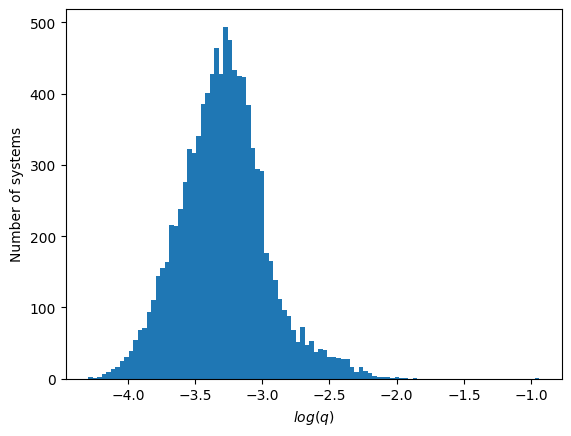

In [ ]:
# plots for overleaf

# bins=np.histogram(d_c_1['rho'], bins=2000)[1]
plt.hist(np.log10(d_c_1['rho']), bins = 100)
plt.xlabel(r"$ log(q) $")
plt.ylabel('Number of systems')
# plt.gca().set_xscale('log')
plt.show()

In [ ]:
from scipy import interpolate
import numpy as np
precision = np.loadtxt(r"/content/drive/MyDrive/roman_precision.txt")
interp = interpolate.interp1d(precision[:, 0], precision[:, 1], kind = 'linear')

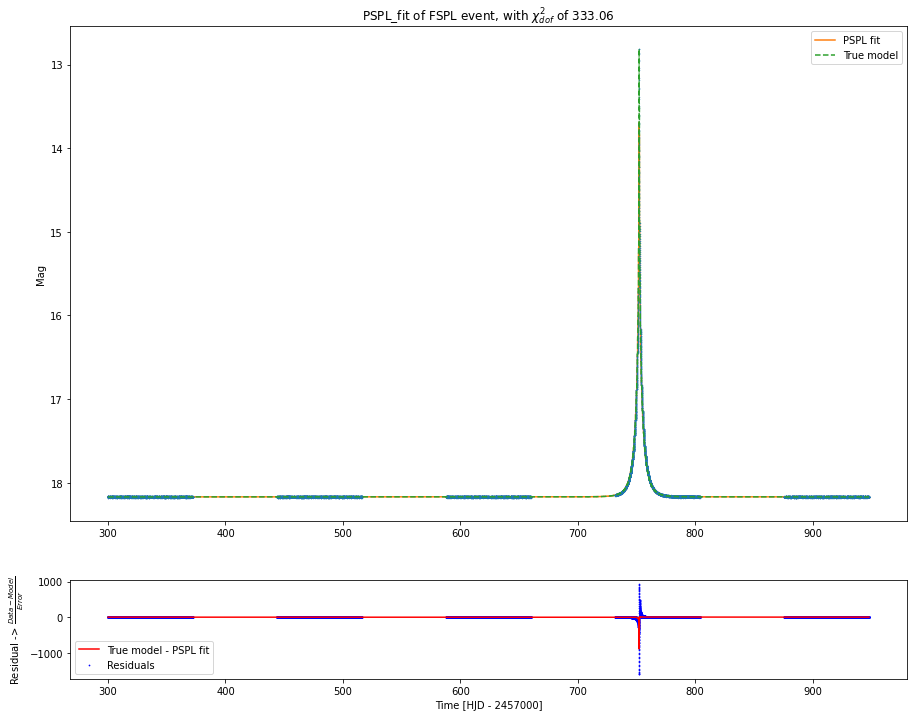

In [ ]:
# plot model, fitted curve, data and residuals

import matplotlib.pyplot as plt
import math
def plot_event_t(output_dir, index, save = True):
    original_params = [d_c_1.loc[index].tolist()[i] for i in [0,1,2,7,8]]
    # print(fitted_params)
    # print(original_params)
    # fitted_params = original_params
    fitted_params = [f for f in d_c_1.loc[index].tolist()[14:] if ~np.isnan(f)]
    if math.isnan(d_c_1.loc[index].logs):
        mod = 'FSPL'
        original_params = [d_c_1.loc[index].tolist()[i] for i in [0,1,2,3,7,8]]
    else:
        mod = 'FSBL'
        original_params = [d_c_1.loc[index].tolist()[i] for i in [0,1,2,3,4,5,6,7,8]]
    data = np.array(d_c_1.loc[index]['w149_mag'])
    m = np.array(get_mag(fitted_params), dtype = 'float32')
    true = np.array(get_mag(original_params, ty = mod), dtype = 'float32')
    m_mask = np.searchsorted(m[0], data[:,0])
    times = m[0][m_mask]
    vals = m[1][m_mask]
    residuals = (data[:,1] - vals)/data[:, 2]
    uncerts = interp(true[1])
    residuals2 =  (true[1] - m[1])/uncerts
    fig, ax = plt.subplots(2, 1, figsize = (15, 12), gridspec_kw={'height_ratios': [5, 1]})
    fig.patch.set_facecolor('white')
    ax[0].errorbar(data[:,0]-2457000, data[:,1], yerr=data[:,2], fmt='.', markersize = '1', elinewidth = 0.5)
    ax[0].plot(m[0]-2457000, m[1], label = 'PSPL fit')
    ax[0].plot(true[0]-2457000, true[1], label = 'True model', zorder = 100, linestyle = 'dashed')
    ax[1].set_xlabel('Time [HJD - 2457000]')
    ax[0].set_ylabel('Mag')
    ax[1].set_ylabel(r'Residual -> $\frac{Data - Model}{Error}$')
    ax[1].plot(m[0]-2457000, residuals2, label = 'True model - PSPL fit', zorder = 10, c = 'red')
    ax[1].scatter(times-2457000,residuals, s = 0.5, label = 'Residuals', c = 'blue')
    # print(m[0], times)
    # print()
    ax[1].legend()
    ax[0].legend()
    ax[0].invert_yaxis()
    # ax[0].grid(True)
    # ax[1].grid(True)
    ax[0].set_title(r'PSPL_fit of {} event, with $\chi^2_{{dof}}$ of {}'.format(mod, round(d_c_1.loc[index]['chi^2_dof'],2)))
    # plt.suptitle('Light curve params: {}, Fitted params: {}'.format(original_params, fitted_params[:-1]))
    if save:
        fig.savefig(output_dir + '\{}_event_{}'.format(mod, index))
    else:
        plt.show()

plot_event_t('', index = 6543, save = False)

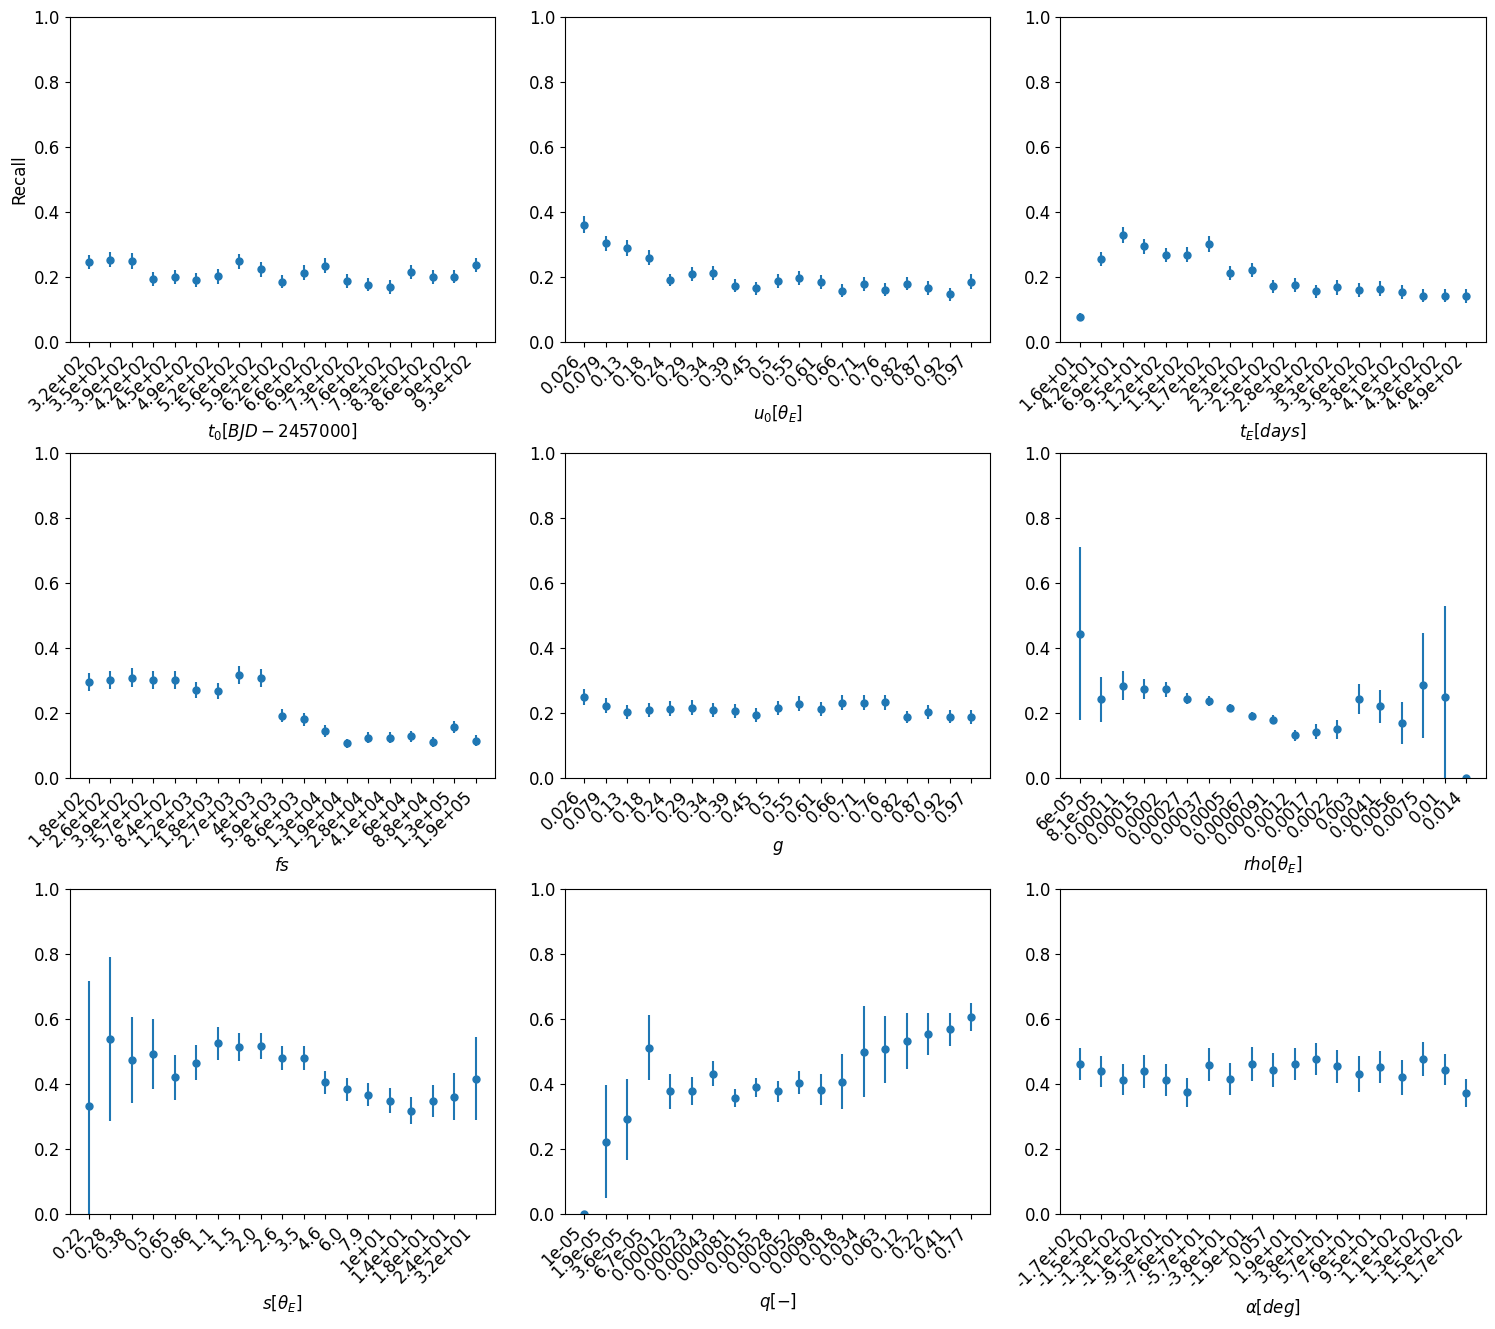

In [ ]:
# plot recall

THRESHOLD = 1.7

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3,3, figsize = (15,15))
ax = ax.ravel()
q = 20
params_list = {'t_0': q, 'u_0': q, 't_E': q, 'fs_W149': q, 'g_W149': q, 'rho': q, 'logs': q, 'logq': q, 'alpha': q}
y = [['t_0', 'BJD - 2457000'], ['u_0', '\\theta_E'], ['t_E', 'days'], ['fs', '-'], ['g', '-'], ['rho', '\\theta_E'], ['s', '\\theta_E'],['q', '-'],['\\alpha', 'deg']]
j = 0
for i, v in params_list.items():
#     print(i)
    k = plot_auc(i,v)
    if i == 't_0':
        a = np.array(k[1]) - 2457000
    else:
        a = k[1]
#     print(v, k)
#     print(k[1])
    o = ax[j].errorbar([r for r in range(v-1)],k[0], yerr = k[2], ls = 'None', markersize = '10', fmt='.')
    plt.setp(ax[j].get_xticklabels(), rotation=45, horizontalalignment='right')
#     print(v,)
    ax[j].set_xticks([r for r in range(v-1)])
    ax[j].set_xticklabels([f'{y:.2}' for y in a])
    if i in ['fs_W149', 'g_W149']:
        ax[j].set_xlabel(f"${y[j][0]}$")
    else:
        ax[j].set_xlabel(f"${y[j][0]}  [{y[j][1]}]$")
    ax[j].set_ylim([0,1])
    j+=1
    
fig.tight_layout()
plt.setp(ax[0], ylabel="Recall") 
fig.subplots_adjust(top=0.88)
# plt.suptitle("Mean recall of curves binned (bins of equal width) by parameter")
plt.show()

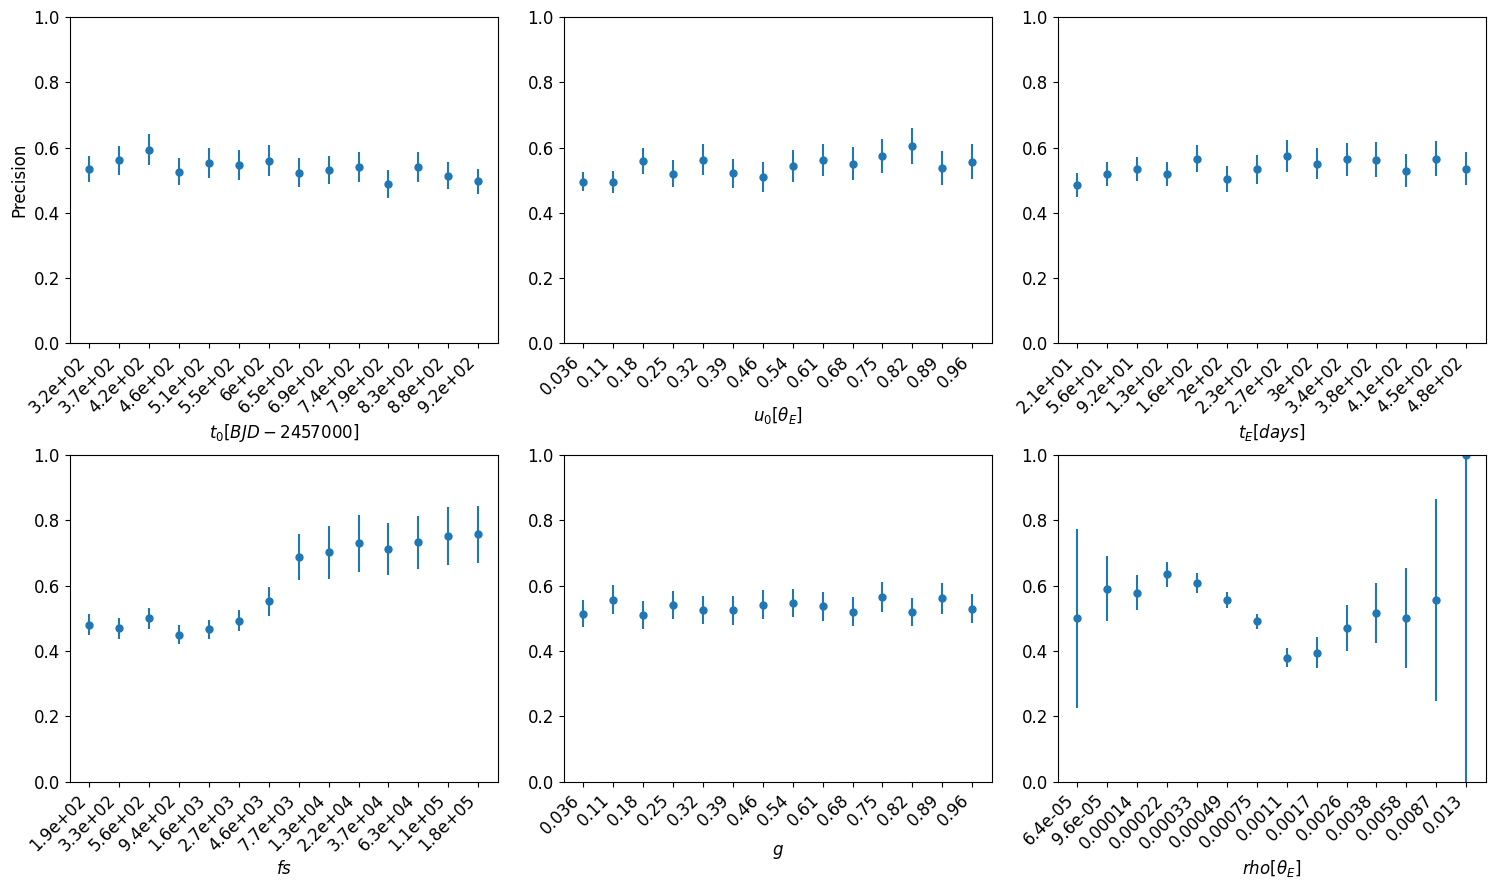

In [ ]:
# plot precision

THRESHOLD = 1.7
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(2,3, figsize = (15,10))
j = 0
# [l.set_visible(False) for (i,l) in enumerate(ax.get_ticklabels()) if i % 2 != 0]
ax = ax.ravel()
r = 15
params_list = {'t_0': r, 'u_0': r, 't_E': r, 'fs_W149': r, 'g_W149': r, 'rho': r}
y = [['t_0', 'BJD - 2457000'], ['u_0', '\\theta_E'], ['t_E', 'days'], ['fs', '-'], ['g', '-'], ['rho', '\\theta_E']]
for i, v in params_list.items():
#     print(i)
    k = plot_auc(i,v)
    if i == 't_0':
        a = np.array(k[1]) - 2457000
    else:
        a = k[1]
#     print(v, k)
#     print(k[1])
    o = ax[j].errorbar([r for r in range(v-1)],k[3], yerr = k[4], ls = 'None', markersize = '10', fmt='.')
    plt.setp(ax[j].get_xticklabels(), rotation=45, horizontalalignment='right')
#     print(v,)
    ax[j].set_xticks([r for r in range(v-1)])
    ax[j].set_xticklabels([f'{y:.2}' for y in a])
    if i in ['fs_W149', 'g_W149']:
        ax[j].set_xlabel(f"${y[j][0]}$")
    else:
        ax[j].set_xlabel(f"${y[j][0]}  [{y[j][1]}]$")
    ax[j].set_ylim([0,1])
    j+=1
    
fig.tight_layout()
plt.setp(ax[0], ylabel="Precision") 
fig.subplots_adjust(top=0.88)
# plt.suptitle("Mean recall of curves binned (bins of equal width) by parameter")
plt.show()

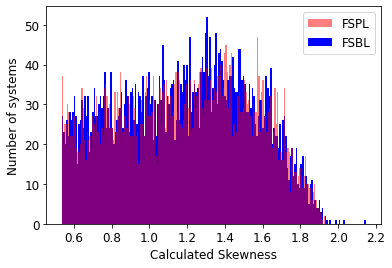

In [ ]:
#  plot skewness distribution

plt.hist(d_c_1[d_c_1.logs.isnull()]['Skewness2'], label = 'FSPL', color = 'red', bins = 200,  zorder = 10, alpha = 0.5)
plt.hist(d_c_1[d_c_1.logs.notnull()]['Skewness2'], label = 'FSBL', color = 'blue', bins = 200)
# plt.hist(combined_data[(combined_data.index >= 10000) & (combined_data.index < 15000)]['Skewness2'], label = 'PSBL', color = 'blue', bins = 200, cumulative = True)
# plt.hist(combined_data[(combined_data.index >= 20000) & (combined_data.index < 25000)]['Skewness2'], label = 'FSBL', color = 'red', bins = 200, cumulative = True)
# plt.gca().set_xscale('log')
# plt.title('Cumulative histogram of Skewness metric of light curves')
plt.xlabel('Calculated Skewness')
plt.ylabel('Number of systems')
plt.savefig(r'C:\Users\vikra\Downloads\TansuPlots\Gap_90\skewness_dist')
plt.legend()
plt.show()

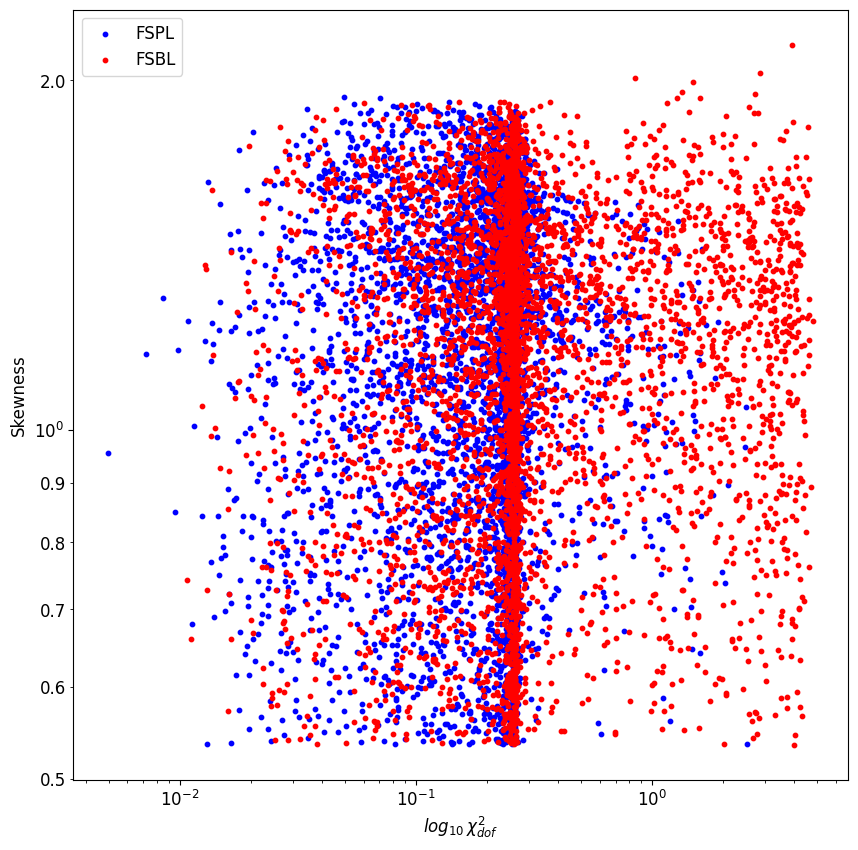

In [ ]:
# plot skewness v chi2

plt.figure(figsize=(10,10))
# plt.scatter(data_culled[(data_culled.index >= 15000) & (data_culled.index < 20000)]['chi^2_dof'], data_culled[(data_culled.index >= 15000) & (data_culled.index < 20000)]['Skewness2'], label = 'FSPL', color = 'orange')
plt.scatter(np.log10(d_c_1[d_c_1.logs.isnull()]['chi^2_dof']), d_c_1[d_c_1.logs.isnull()]['Skewness2'], label = 'FSPL', color = 'blue',s = 10)
# plt.scatter(np.log10(data_culled[(data_culled.index >= 10000) & (data_culled.index < 15000)]['chi^2_dof']), data_culled[(data_culled.index >= 10000) & (data_culled.index < 15000)]['Skewness2'], label = 'PSBL', color = 'blue')
plt.scatter(np.log10(d_c_1[d_c_1.logs.notnull()]['chi^2_dof']), d_c_1[d_c_1.logs.notnull()]['Skewness2'], label = 'FSBL', color = 'red', s=10)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.title('Scatter plot of Skewness metric against $log(\chi^2_{dof})$')
plt.xlabel('$log_{10} \, \chi^2_{dof}$')
plt.ylabel('Skewness')
plt.savefig(r'C:\Users\vikra\Downloads\TansuPlots\Gap_90\skewness_vs_chi_2')
plt.legend()
plt.gca().yaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.show()

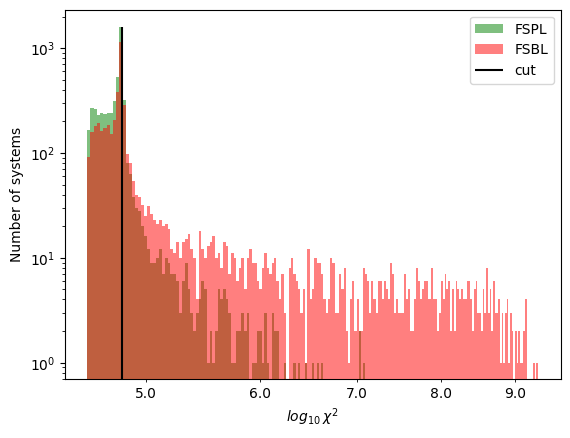

In [ ]:
# plot chi2 distribution

%matplotlib inline
import matplotlib.ticker as mticker
plt.style.use('default')
a = np.log10(d_c_1[d_c_1.logs.isnull() & d_c_1.t_0_pred.notnull()]['chi^2_1'])
b = np.log10(d_c_1[d_c_1.logs.notnull() & d_c_1.t_0_pred.notnull()]['chi^2_1'])
l = d_c_1.iloc[0]['w149_mag'].shape[0] + d_c_1.iloc[0]['z087_mag'].shape[0]
# print(a)
bins=np.histogram(np.hstack((a,b)), bins=200)[1]
#lt.hist(data_culled[(data_culled.index >= 15000) & (data_culled.index < 20000)]['chi^2_dof'], label = 'FSPL', color = 'green')
plt.hist(a, label = 'FSPL', color = 'green', bins = bins, zorder = 2, alpha = 0.5, cumulative = False)
# plt.hist(dat[(dat.index >= 10000) & (dat.index < 15000)]['chi^2'], label = 'PSBL', color = 'blue', bins = 200, zorder = 1, alpha = 0.3)
plt.hist(b, label = 'FSBL', color = 'red', bins = bins, zorder = 5, alpha = 0.5, cumulative = False)
plt.vlines(np.log10(l*1.85), 0, 1600, label = 'cut', zorder = 100)
plt.gca().set_xscale('log')
# plt.title('Histogram of $\chi^2$ distributions of models when fit with PSPL model')
plt.xlabel('$log_{10} \, \chi^2$')
plt.ylabel('Number of systems')
plt.yscale('log')
plt.gca().xaxis.set_minor_formatter(mticker.ScalarFormatter())
# plt.gca().yaxis.set_minor_formatter(mticker.ScalarFormatter())
plt.legend()
# plt.xlim([30000,200000])
# plt.yscale('log')
# plt.savefig(r'C:\Users\vikra\Downloads\TansuPlots\Gap_90\chi_2_dist')
plt.show()
# green, blue, orange/red
# log bins as well as log scale
# plotting parameter ranges - colour differenetly points which are selected for fitting - colour differently for model type psbl...


In [ ]:
# generate ROC and precision recall curve

roc_vals = []
pr_re = []
l = 500
y = 50
# important_data[important_data.logs.isnull()]
total_fspl = len(d_c_1[d_c_1.logs.isnull() & d_c_1.t_0_pred.notnull()])
total_fsbl =len(d_c_1[d_c_1.logs.notnull() & d_c_1.t_0_pred.notnull()])
total = total_fspl+total_fsbl

for i in range(l):
    fspl = d_c_1[d_c_1.logs.isnull() & d_c_1.t_0_pred.notnull()][d_c_1['chi^2_dof'] > 0.5+i/y]
#     psbl = data_culled[(data_culled.index >= 10000) & (data_culled.index < 15000)][data_culled['chi^2_dof'] > 1+i/l]
    fsbl = d_c_1[d_c_1.logs.notnull() & d_c_1.t_0_pred.notnull()][d_c_1['chi^2_dof'] > 0.5+i/y]
    tp = (len(fsbl))
    tn = (total_fspl-len(fspl))
    fp = len(fspl)
    fn = (total_fsbl-len(fsbl))
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_vals.append([1+i/y, tpr, fpr])
#     roc_vals.append([1+i/l, len(pspl)/(len(pspl)+len(psbl)+len(fsbl)), (len(psbl)+len(fsbl))/(len(pspl)+len(psbl)+len(fsbl))])
#     print(r'chi^2_dof was taken at {} and leaves {} PSPL events and {} Binary events'.format(1+i/100, len(pspl), len(psbl)+len(fsbl)))
    pr_re.append([tp/(tp+fp), tp/(tp+fn)])
    # print(r'chi^2_dof cut was taken at {} and gives an accuracy of {}%, precision of {}%, and recall of {}%'.format(1+i/y, (tp+tn)/total*100, round(100*tp/(tp+fp),2), round(100*tp/(tp+fn),2)))
roc_vals = np.array(roc_vals)
pr_re = np.array(pr_re)

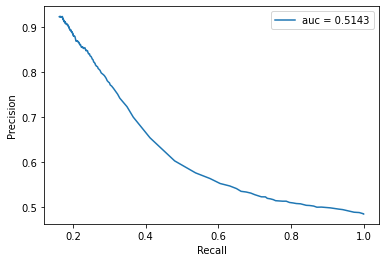

In [ ]:
# plot precision v recall

from sklearn.metrics import auc
ac = auc(pr_re[:,1], pr_re[:,0])
plt.plot(pr_re[:,1], pr_re[:,0], label = f'auc = {round(ac,4)}')
# plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.legend()
# plt.title('Precision against recall for binary and single lens event classification')
plt.legend(loc='best')
plt.xlabel("Recall")
plt.ylabel("Precision")
# plt.savefig(r'C:\Users\vikra\Downloads\TansuPlots\Gap_90\precision_recall')
plt.show()

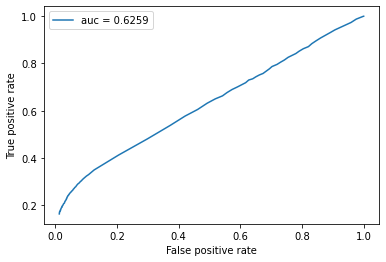

In [ ]:
# plot ROC

ac = auc(roc_vals[:,2], roc_vals[:,1])
plt.plot(roc_vals[:,2], roc_vals[:,1], label = f'auc = {round(ac,4)}')
# plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.legend()
# plt.title('Precision against recall for binary and single lens event classification')
plt.legend(loc='best')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
# plt.savefig(r'C:\Users\vikra\Downloads\TansuPlots\Gap_90\precision_recall')
plt.show()

In [ ]:
# get magnitude given parameters and model type

from pyLIMA import microlfits, microltoolbox

def get_mag(fancyy, ty = 'PSPL'):
    test_event = event.Event()
    test_event.telescopes.append(microlsimulator.simulate_a_telescope('RomanP',test_event, 2457300, 2457948, 0.25, 'Space','W149',
                    uniform_sampling=True))
    fit = microlfits.MLFits(test_event)
    time = test_event.telescopes[-1].lightcurve_flux[:, 0]
    model_t = microlsimulator.simulate_a_microlensing_model(test_event, ty)
    pyLIMA_parameters = model_t.compute_pyLIMA_parameters(fancyy)
    flux_model = model_t.compute_the_microlensing_model(test_event.telescopes[-1], pyLIMA_parameters)
    # print(flux_model)
    magnitude = microltoolbox.flux_to_magnitude(flux_model[0])
    # print(flux_model[0])
    return time, magnitude

# get_mag([100,1,1])
# print()

1


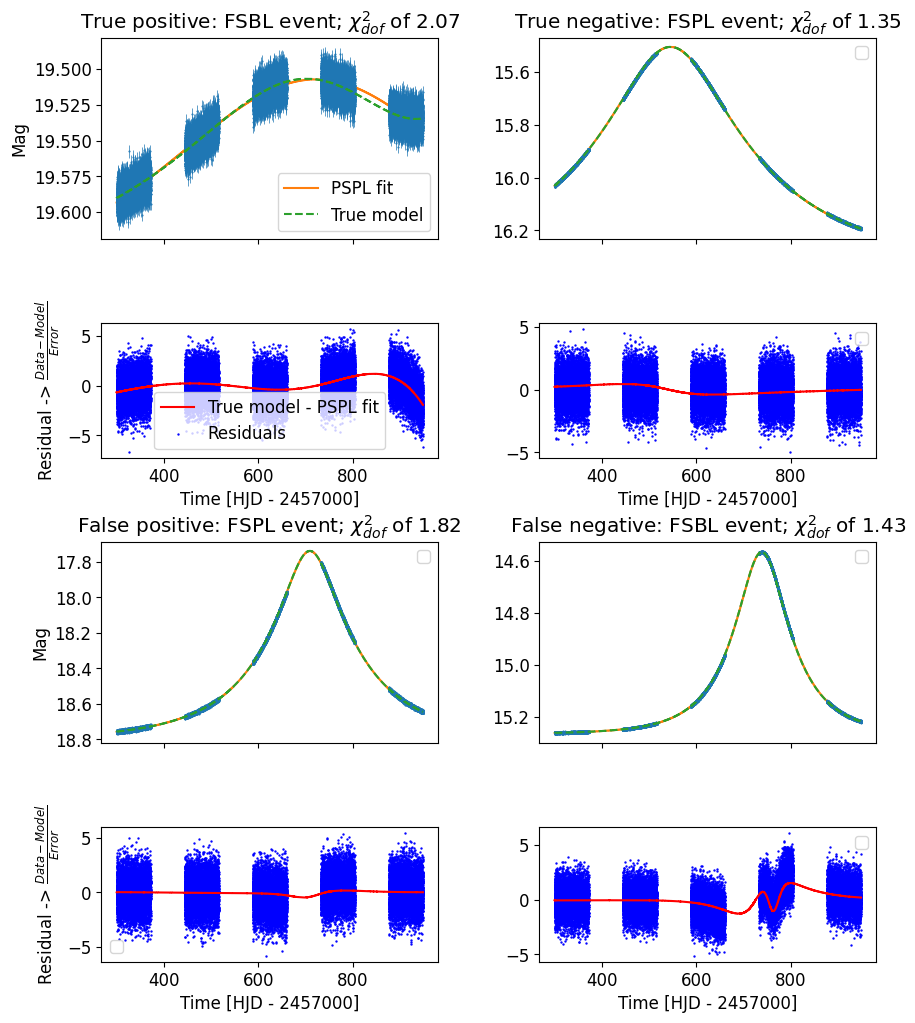

In [ ]:
# plot 4 gird example classifications

import math
from matplotlib import gridspec
plt.rcParams.update({'font.size': 12})
THRESHOLD = 1.8
def choose_vals(parameter, range):
    temp_dat = d_c_1[(range[0] <= d_c_1[parameter]) & (d_c_1[parameter] <= range[1])]
    try:
        tp = temp_dat[temp_dat.logs.notnull() & (temp_dat['chi^2_dof'] > THRESHOLD)].sample(1)
    except:
        tp = 0
    try:
        fp = temp_dat[temp_dat.logs.isnull() & (temp_dat['chi^2_dof'] > THRESHOLD)].sample(1)
    except:
        fp = 0
    fn = temp_dat[temp_dat.logs.notnull() & (temp_dat['chi^2_dof'] < THRESHOLD)].sample(1)
    tn = temp_dat[temp_dat.logs.isnull() & (temp_dat['chi^2_dof'] < THRESHOLD)].sample(1)
    return tp, tn, fp, fn

def create_plot(events, ranges, parameter, save = False, bin = 0):
    fig, ax = plt.subplots(4,2, figsize = (10, 12), gridspec_kw={'height_ratios':[3,2,3,2], 'wspace':0.3, 'hspace':0.5})
    # gs = gridspec.GridSpec(4, 2,
    #      wspace=1, hspace=1, top=0.95, bottom=0.05, left=0.17, right=0.845) 
    # ax = ax.ravel(9
    y = 0
    u = ['True positive', 'True negative', 'False positive', 'False negative']
    e = 0
    for i,event in enumerate(events):
        e = i
        if i in [2,3]:
            i -= 2
            y = 2
        else:
            y = 0
        if type(event) == int:
            pass
        else:
            event = event.iloc[0]
            # fitted_params = original_params
            fitted_params = [f for f in event.tolist()[14:] if ~np.isnan(f)]
            if math.isnan(event.logs):
                mod = 'FSPL'
                original_params = [event.tolist()[i] for i in [0,1,2,3,7,8]]
            else:
                mod = 'FSBL'
                original_params = [event.tolist()[i] for i in [0,1,2,3,4,5,6,7,8]]
            data = np.array(event['w149_mag'])
            m = np.array(get_mag(fitted_params), dtype = 'float32')
            # print(original_params)
            true = np.array(get_mag(original_params, ty = mod), dtype = 'float32')
            m_mask = np.searchsorted(m[0], data[:,0])
            times = m[0][m_mask]
            vals = m[1][m_mask]
            residuals = (data[:,1] - vals)/data[:, 2]
            # print(f'SUMMM {sum(residuals**2)}')
            # fig, ax = plt.subplots(2, 1, figsize = (10, 8), gridspec_kw={'height_ratios': [5, 1]})
            fig.patch.set_facecolor('white')
            ax[y,i].errorbar(data[:,0]-2457000, data[:,1], yerr=data[:,2], fmt='.', markersize = '1', elinewidth = 0.5)
            uncerts = interp(true[1])
            residuals2 =  (true[1] - m[1])/uncerts
            if e == 0:
                ax[y,i].plot(m[0]-2457000, m[1], label = 'PSPL fit')
                ax[y,i].plot(true[0]-2457000, true[1], label = 'True model', zorder = 100, linestyle = 'dashed')
                ax[y+1,i].plot(m[0]-2457000, residuals2, label = 'True model - PSPL fit', zorder = 10, c = 'red')
                ax[y+1,i].scatter(times-2457000,residuals, s=0.5, label = 'Residuals', c = 'blue')
            else: 
                ax[y,i].plot(m[0]-2457000, m[1])
                ax[y,i].plot(true[0]-2457000, true[1], zorder = 100, linestyle = 'dashed')
                ax[y+1,i].plot(m[0]-2457000, residuals2, zorder = 10, c = 'red')
                ax[y+1,i].scatter(times-2457000,residuals, s=0.5, c = 'blue')
            ax[y+1,i].set_xlabel('Time [HJD - 2457000]')
            if i == 0:
                ax[y,i].set_ylabel('Mag')
                ax[y+1,i].set_ylabel(r'Residual -> $\frac{Data - Model}{Error}$')
            # ax[y+1,i].scatter(times-2457000,residuals, s=0.5)
            # ax[y+1,i].scatter(times-2457000,residuals, s=0.5, label = 'Residuals', c = 'blue')
            ax[y+1,i].legend()
            ax[y,i].legend()
            ax[y,i].invert_yaxis()
            # ax[y,i].grid(True)
            ax[y,i].set_xticklabels([])
            # ax[y+1,i].grid(True)
            plt.subplots_adjust(wspace=0.01,hspace=0.01)
            # print(fitted_params)
            ax[y,i].set_title(r'{}: {} event; $\chi^2_{{dof}}$ of {}'.format(u[e], mod, round(event['chi^2_dof'],2)))
            # plt.suptitle('Parameter {} between {} and {}'.format(parameter, round(ranges[0],2), round(ranges[1],2)))
            # fig.tight_layout()
            # fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save:
        # print(r'/content/drive/MyDrive/Precision_recall_fits/{}_{}.png'.format(parameter, np.round((ranges[0]+ranges[1])/2)))
            # print(np.round((ranges[0]+ranges[1])/2))
        fig.savefig(r'/content/drive/MyDrive/Precision_recall_fits/{}_bin_{}.png'.format(parameter, bin))
        # # else:
        # plt.show()
    
def plot(parameter, bins = 4):
    values = d_c_1[parameter]
    min_val, max_val = min(values), max(values)
    if parameter in ['rho', 'fs_W149']:
        if parameter == 'rho':
            l = -1.7
        else:
            l = np.log10(max_val)
        separators = np.logspace(np.log10(min_val), l, bins+1)
    else: 
        separators = np.linspace(min_val, max_val, bins+1)
    # print(separators)
#     t = 0
    bin_vals = []
    r = []
    s = 0
    for i in range(len(separators)-1):
        s += 1
        print(s)
        if s == 1:
#         data[data.logs.notnull()][data['chi^2_dof'] > THRESHOLD]
            r.append(choose_vals(parameter, [separators[i], separators[i+1]]))
            create_plot(choose_vals(parameter, [separators[i], separators[i+1]]), ranges = [separators[i], separators[i+1]], parameter = parameter, save = False, bin = s)
        # print(r[-1][0].t_0)
    # return create_plot(r)

plot('t_0', bins = 1)
# plot('u_0')
# plot('t_E')
# plot('rho')
# plot('fs_W149')
# plot('g_W149')
print()

In [ ]:
# selecting and plotting sample classifications

def choose_vals_b(parameter, range):
    temp_dat = d_c_1[(range[0] <= d_c_1[parameter]) & (d_c_1[parameter] <= range[1])]
    tp = temp_dat[temp_dat.logs.notnull() & (temp_dat['chi^2_dof'] > THRESHOLD)].sample(1)
    # fp = temp_dat[temp_dat.logs.isnull() & (temp_dat['chi^2_dof'] > THRESHOLD)].sample(1)
    fn = temp_dat[temp_dat.logs.notnull() & (temp_dat['chi^2_dof'] < THRESHOLD)].sample(1)
    # tn = temp_dat[temp_dat.logs.isnull() & (temp_dat['chi^2_dof'] < THRESHOLD)].sample(1)
    return tp, fn

def create_plot_b(events, ranges, parameter, save = False, bin = 0):
    fig, ax = plt.subplots(2,2, figsize = (8,5), gridspec_kw={'height_ratios':[3,2]})
    # ax = ax.ravel()
    y = 0
    u = ['True positive', 'False negative']
    e = 0
    for i,event in enumerate(events):
        e = i
        event = event.iloc[0]
        # fitted_params = original_params
        fitted_params = [f for f in event.tolist()[14:] if ~np.isnan(f)]
        if math.isnan(event.logs):
            mod = 'FSPL'
            original_params = [event.tolist()[i] for i in [0,1,2,3,7,8]]
        else:
            mod = 'FSBL'
            original_params = [event.tolist()[i] for i in [0,1,2,3,4,5,6,7,8]]
        data = np.array(event['w149_mag'])
        m = np.array(get_mag(fitted_params), dtype = 'float32')
        # print(original_params)
        true = np.array(get_mag(original_params, ty = mod), dtype = 'float32')
        m_mask = np.searchsorted(m[0], data[:,0])
        times = m[0][m_mask]
        vals = m[1][m_mask]
        residuals = (data[:,1] - vals)/data[:, 2]
        # print(f'SUMMM {sum(residuals**2)}')
        # fig, ax = plt.subplots(2, 1, figsize = (10, 8), gridspec_kw={'height_ratios': [5, 1]})
        fig.patch.set_facecolor('white')
        ax[y,i].errorbar(data[:,0]-2457000, data[:,1], yerr=data[:,2], fmt='.', markersize = '1', elinewidth = 0.5)
        ax[y,i].plot(m[0]-2457000, m[1], label = 'PSPL fit')
        ax[y,i].plot(true[0]-2457000, true[1], label = 'True model', zorder = 100, linestyle = 'dashed')
        ax[y+1,i].set_xlabel('Time [HJD - 2457000]')
        if i == 0:
            ax[y,i].set_ylabel('Mag')
            ax[y+1,i].set_ylabel(r'Residual -> $\frac{Data - Model}{Error}$')
        uncerts = interp(true[1])
        residuals2 =  (true[1] - m[1])/uncerts
        ax[y+1,i].plot(m[0]-2457000, residuals2, label = 'True model - PSPL fit', zorder = 10, c = 'red')
        ax[y+1,i].scatter(times-2457000,residuals, s=0.5, label = 'Residuals', c = 'blue')
        ax[y+1,i].legend()
        ax[y,i].legend()
        ax[y,i].invert_yaxis()
        ax[y,i].grid(True)
        ax[y+1,i].grid(True)
        # print(fitted_params)
        ax[y,i].set_title(r'{}: PSPL_fit of {} event, with $\chi^2_{{dof}}$ of {}'.format(u[e], mod, round(event['chi^2_dof'],2)))
        plt.suptitle('Parameter {} between {} and {}'.format(parameter, round(ranges[0],2), round(ranges[1],2)))
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save:
        # # else:
        fig.savefig(r'/content/drive/MyDrive/Precision_recall_fits/{}_bin_{}.png'.format(parameter, bin))
        plt.show()
    
def plot(parameter, bins = 4):
    values = d_c_1[parameter]
    min_val, max_val = min(values), max(values)
    separators = np.linspace(min_val, max_val, bins+1)
    print(separators)
#     t = 0
    bin_vals = []
    r = []
    s = 0
    for i in range(len(separators)-1):
        s += 1
#         data[data.logs.notnull()][data['chi^2_dof'] > THRESHOLD]
        r.append(choose_vals_b(parameter, [separators[i], separators[i+1]]))
        create_plot_b(choose_vals_b(parameter, [separators[i], separators[i+1]]), ranges = [separators[i], separators[i+1]], parameter = parameter, save = False, bin = s)
            # print(r[-1][0].t_0)
    # return create_plot(r)

plot('logs')
# plot('logq')
# plot('alpha')
print()

[-0.73078038 -0.15857979  0.4136208   0.98582139  1.55802198]


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7ffadfeb8f80> (for post_execute):


KeyboardInterrupt: ignored